# Exploratory Data Analysis
start by exploring the response variable grade, the one we are supposed to predict at the end of the day

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

data = pd.read_csv('student-por.csv')

# Numeric variables 
- absences
- health
- studytime

variable 1 : absences

     G3
0    11
1    11
2    12
3    14
4    13
..   ..
644  10
645  16
646   9
647  10
648  11

[649 rows x 1 columns]
     absences
0           4
1           2
2           6
3           0
4           0
..        ...
644         4
645         4
646         6
647         6
648         4

[649 rows x 1 columns]
G3          16
absences    21
dtype: int64


,G3,absences
0,11,4
1,11,2
2,12,6
3,14,0
4,13,0
...,...,...
644,10,4
645,16,4
646,9,6
647,10,6


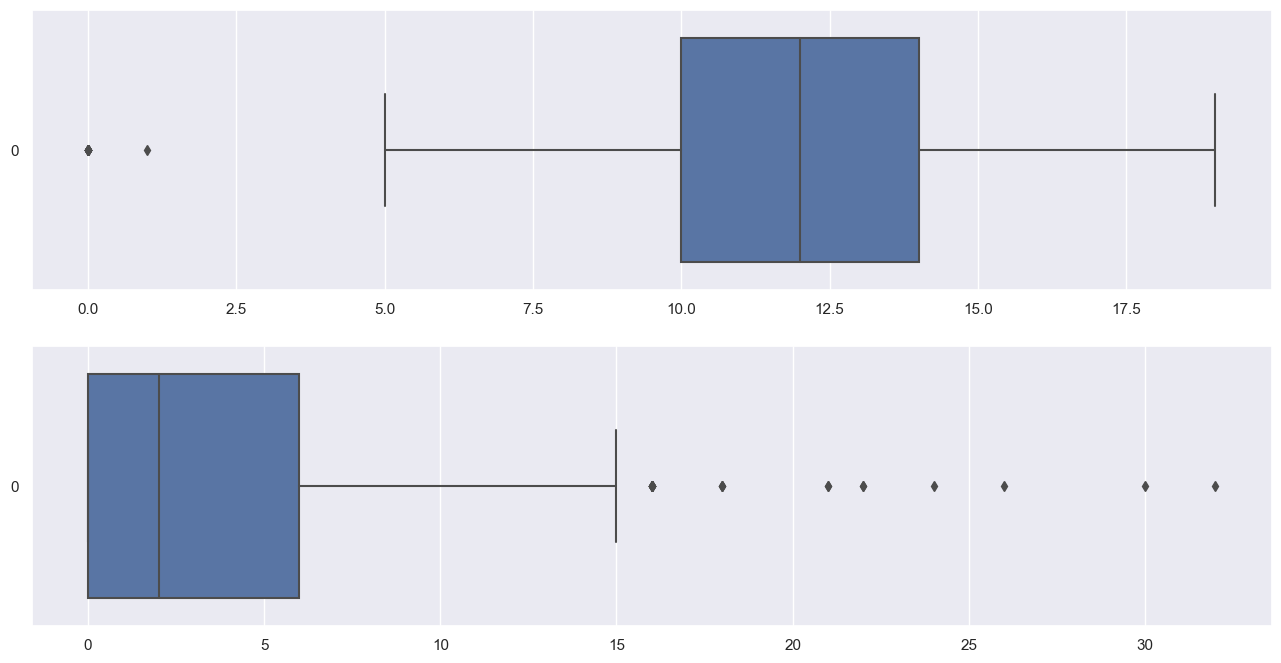

In [3]:
combined = pd.DataFrame(data[['G3','absences']])
f, axes = plt.subplots(2, 1, figsize=(16, 8))
sb.boxplot(data = combined["G3"], orient = "h", ax = axes[0])
sb.boxplot(data = combined["absences"], orient = "h", ax = axes[1])

G3 = pd.DataFrame(data['G3'])   # Response
absences = pd.DataFrame(data['absences'])   # predictor

print(G3)
print(absences)

q1 = combined.quantile(0.25)
q3 = combined.quantile(0.75)
iqr = q3 - q1
#outliers
outliers = combined[~((combined < (q1 - 1.5 * iqr)) | (combined > (q3 + 1.5 * iqr))).any(axis=1)]
count = (((combined < (q1 - 1.5 * iqr)) | (combined > (q3 + 1.5 * iqr) ))).sum()
print(count)
outliers

Intercept of Regression 	: b =  [12.79112321]
Coefficients of Regression 	: a =  [[-0.16637969]]



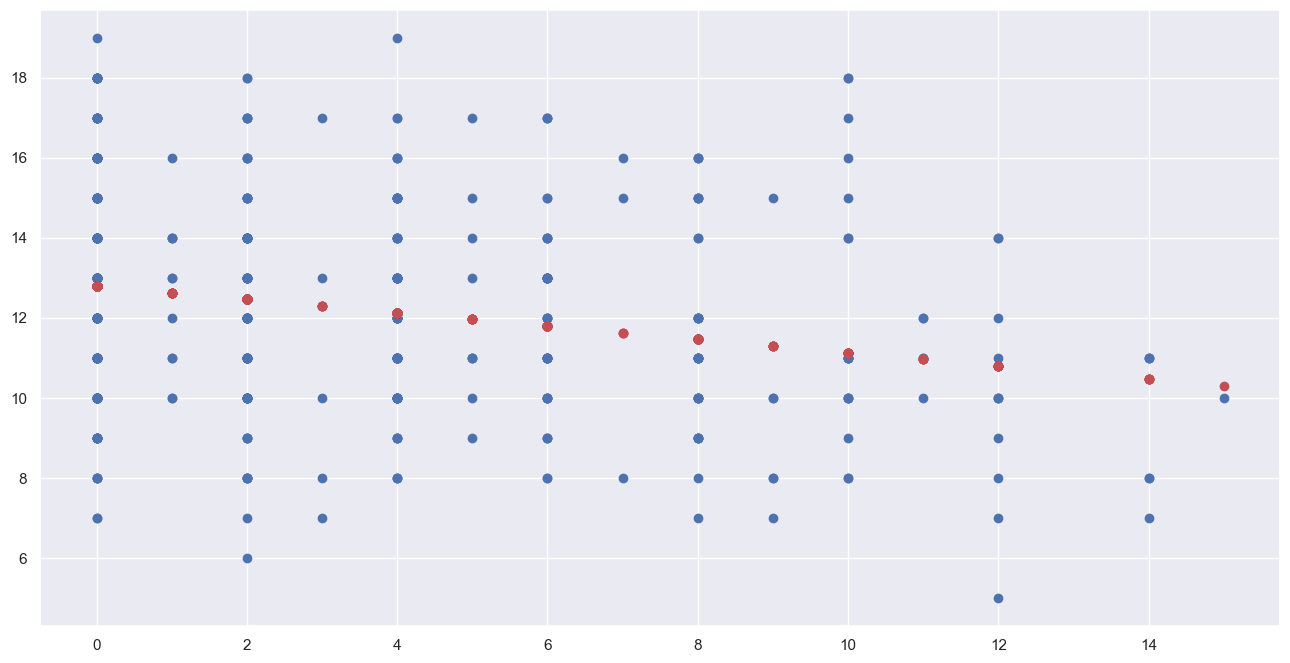

In [4]:
#boxplot method
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#train and test in an 80:20 ratio
G3 = pd.DataFrame(outliers['G3'])   # Response
absences = pd.DataFrame(outliers['absences'])   # predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(absences, G3, test_size = 0.20 , random_state = 4)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict G3 corresponding to absences Train
y_train_pred = linreg.predict(X_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred, color = "r")
plt.show()

In [5]:
#goodness of fit of the model on the train set
# Explained Variance (R^2)
print('Goodness of Fit of Model on Train dataset')
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness of Fit of Model on Train dataset
Explained Variance (R^2) 	: 0.05153041896948862
Mean Squared Error (MSE) 	: 6.521645123161054
Root Mean Squared Error (RMSE) 	: 2.553751186619608


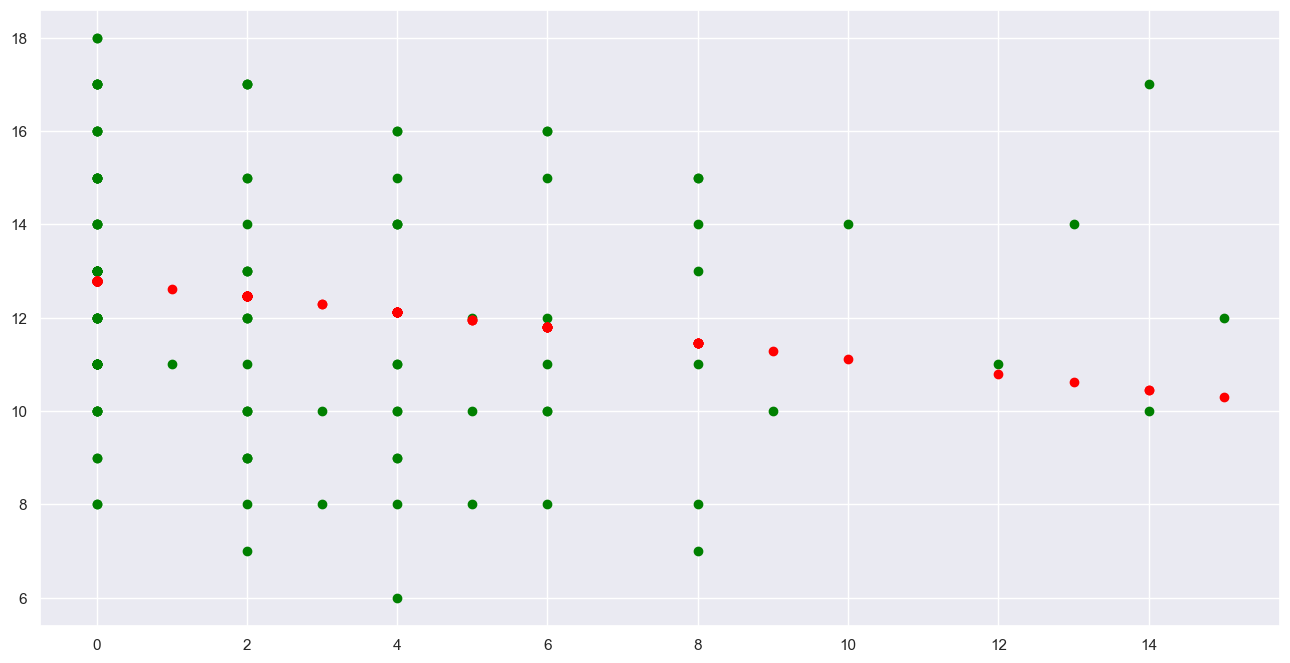

In [6]:
# Predict G3 corresponding to absences Test
y_test_pred = linreg.predict(X_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

In [7]:
# Explained Variance (R^2)
print('Goodness of Fit of Model on Test dataset')
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness of Fit of Model on Test dataset
Explained Variance (R^2) 	: -0.0019495838508398755
Mean Squared Error (MSE) 	: 7.626711221909096
Root Mean Squared Error (RMSE) 	: 2.7616500904186063


# Using of KFold

This dataset has relatively small size (~650 data points). It may lead to unstable performance of models during our analysis. Hence, we decided to use the KFold cross-validation to assess model performance robustly. This technique helps to reduce the variance in performance estimates and provides a more reliable assessment of how well the model generalizes to unseen data.

In [8]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

X = pd.DataFrame(outliers['absences'])  
y = pd.DataFrame(outliers['G3'])                  

# Define the number of folds
k = 5

# Initialize the KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# List to store cross-validation scores
cv_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model
    score = model.score(X_test, y_test)
    
    # Append the score to the list of cross-validation scores
    cv_scores.append(score)

# Calculate and print the mean of the cross-validation scores
print("Mean R^2 Score:", np.mean(cv_scores))


C:\Users\glyni\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\glyni\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\glyni\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\glyni\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Mean R^2 Score: 0.013754883215355517


variable 2 : health

     G3
0    11
1    11
2    12
3    14
4    13
..   ..
644  10
645  16
646   9
647  10
648  11

[649 rows x 1 columns]
     health
0         3
1         3
2         3
3         5
4         5
..      ...
644       5
645       1
646       5
647       2
648       5

[649 rows x 1 columns]
G3        16
health     0
dtype: int64


,G3,health
0,11,3
1,11,3
2,12,3
3,14,5
4,13,5
...,...,...
644,10,5
645,16,1
646,9,5
647,10,2


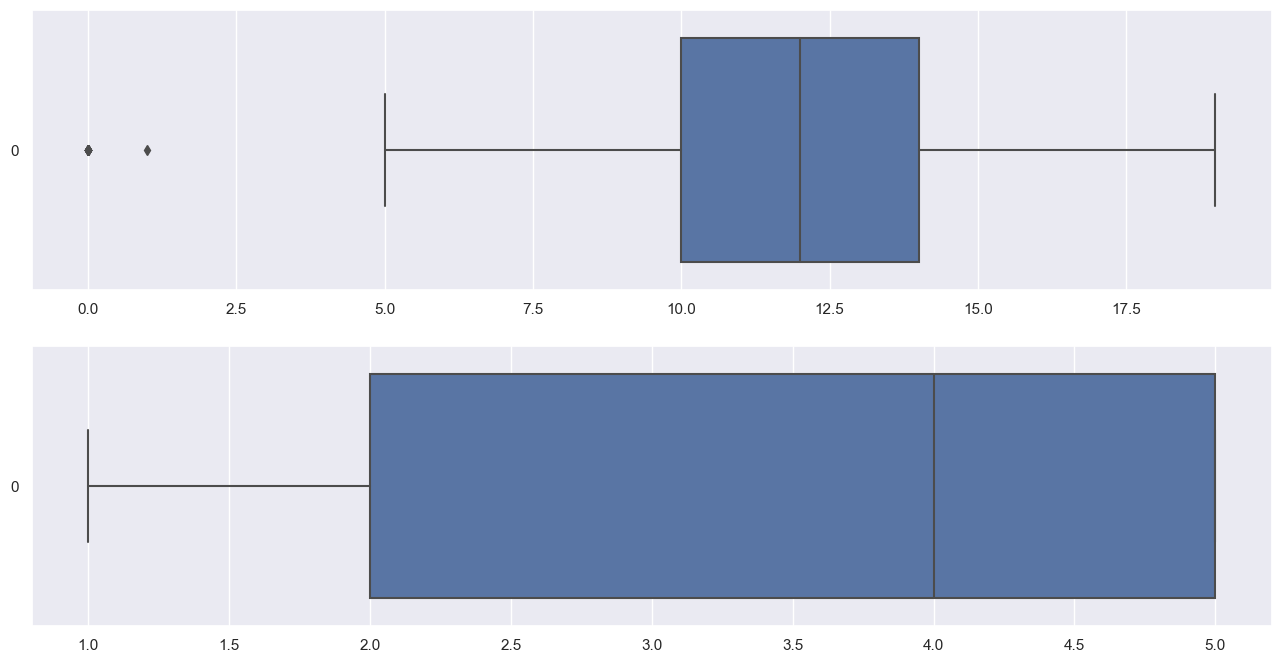

In [9]:
combined = pd.DataFrame(data[['G3','health']])
f, axes = plt.subplots(2, 1, figsize=(16, 8))
sb.boxplot(data = combined["G3"], orient = "h", ax = axes[0])
sb.boxplot(data = combined["health"], orient = "h", ax = axes[1])

G3 = pd.DataFrame(data['G3'])   # Response
health = pd.DataFrame(data['health'])   # predictor

print(G3)
print(health)

q1 = combined.quantile(0.25)
q3 = combined.quantile(0.75)
iqr = q3 - q1
#outliers
outliers = combined[~((combined < (q1 - 1.5 * iqr)) | (combined > (q3 + 1.5 * iqr))).any(axis=1)]
count = (((combined < (q1 - 1.5 * iqr)) | (combined > (q3 + 1.5 * iqr) ))).sum()
print(count)
outliers

Intercept of Regression 	: b =  [12.78200457]
Coefficients of Regression 	: a =  [[-0.16180783]]



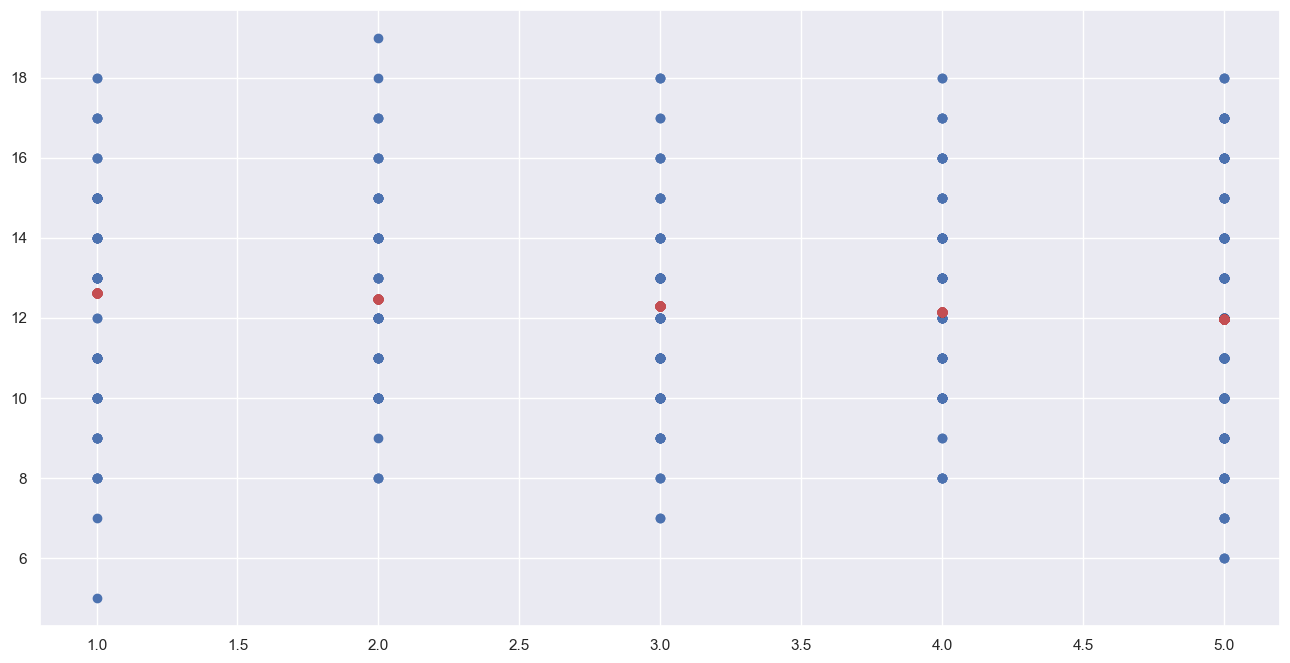

In [10]:
G3 = pd.DataFrame(outliers['G3'])   # Response
health = pd.DataFrame(outliers['health'])   # predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(health, G3, test_size = 0.20 , random_state = 4)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict G3 corresponding to health Train
y_train_pred = linreg.predict(X_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred, color = "r")
plt.show()

In [11]:
#goodness of fit of the model on the train set
# Explained Variance (R^2)
print('Goodness of Fit of Model on Train dataset')
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness of Fit of Model on Train dataset
Explained Variance (R^2) 	: 0.008129837037554988
Mean Squared Error (MSE) 	: 6.80773539586566
Root Mean Squared Error (RMSE) 	: 2.609163734966754


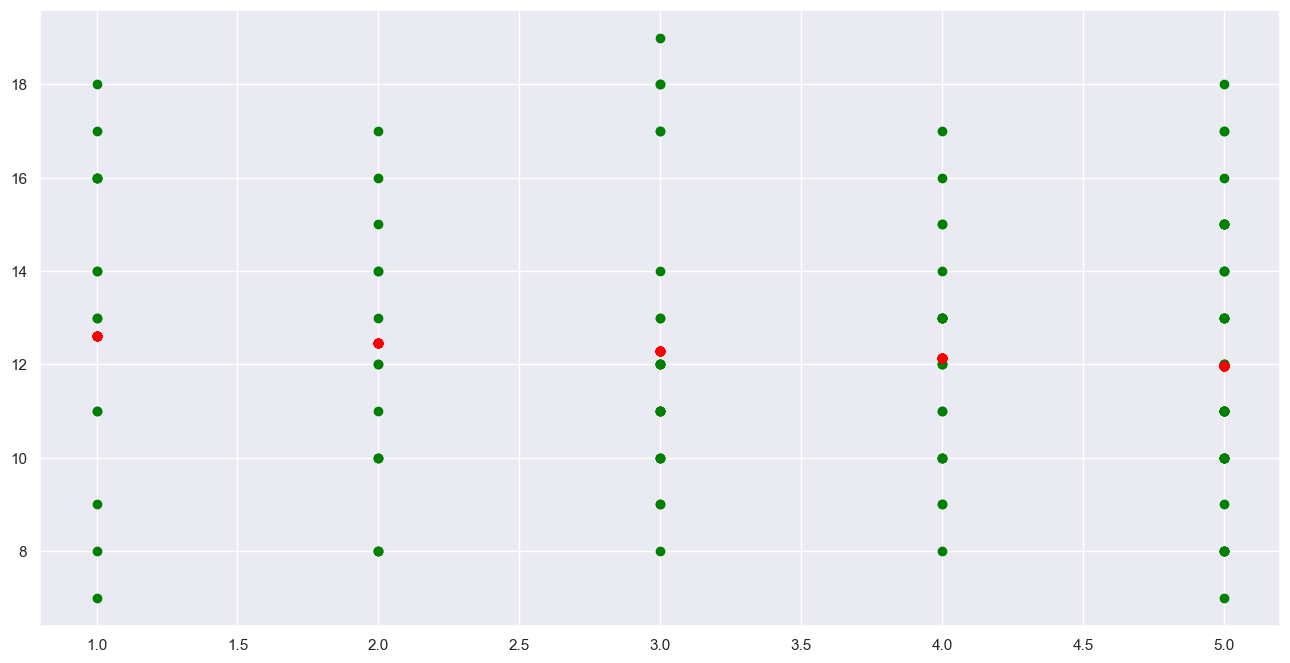

In [12]:
# Predict G3 corresponding to health Test
y_test_pred = linreg.predict(X_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

In [13]:
# Explained Variance (R^2)
print('Goodness of Fit of Model on Test dataset')
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness of Fit of Model on Test dataset
Explained Variance (R^2) 	: 0.012940030269031677
Mean Squared Error (MSE) 	: 7.680328985134635
Root Mean Squared Error (RMSE) 	: 2.771340647617076


In [14]:
X = pd.DataFrame(outliers['health'])  
y = pd.DataFrame(outliers['G3'])               

# Define the number of folds
k = 5

# Initialize the KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# List to store cross-validation scores
cv_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model
    score = model.score(X_test, y_test)
    
    # Append the score to the list of cross-validation scores
    cv_scores.append(score)

# Calculate and print the mean of the cross-validation scores
print("Mean R^2 Score:", np.mean(cv_scores))


C:\Users\glyni\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\glyni\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\glyni\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\glyni\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for

Mean R^2 Score: 0.001503349347629035


variable 3 : studytime

     G3
0    11
1    11
2    12
3    14
4    13
..   ..
644  10
645  16
646   9
647  10
648  11

[649 rows x 1 columns]
     studytime
0            2
1            2
2            2
3            3
4            2
..         ...
644          3
645          2
646          2
647          1
648          1

[649 rows x 1 columns]
G3           16
studytime    35
dtype: int64


,G3,studytime
0,11,2
1,11,2
2,12,2
3,14,3
4,13,2
...,...,...
644,10,3
645,16,2
646,9,2
647,10,1


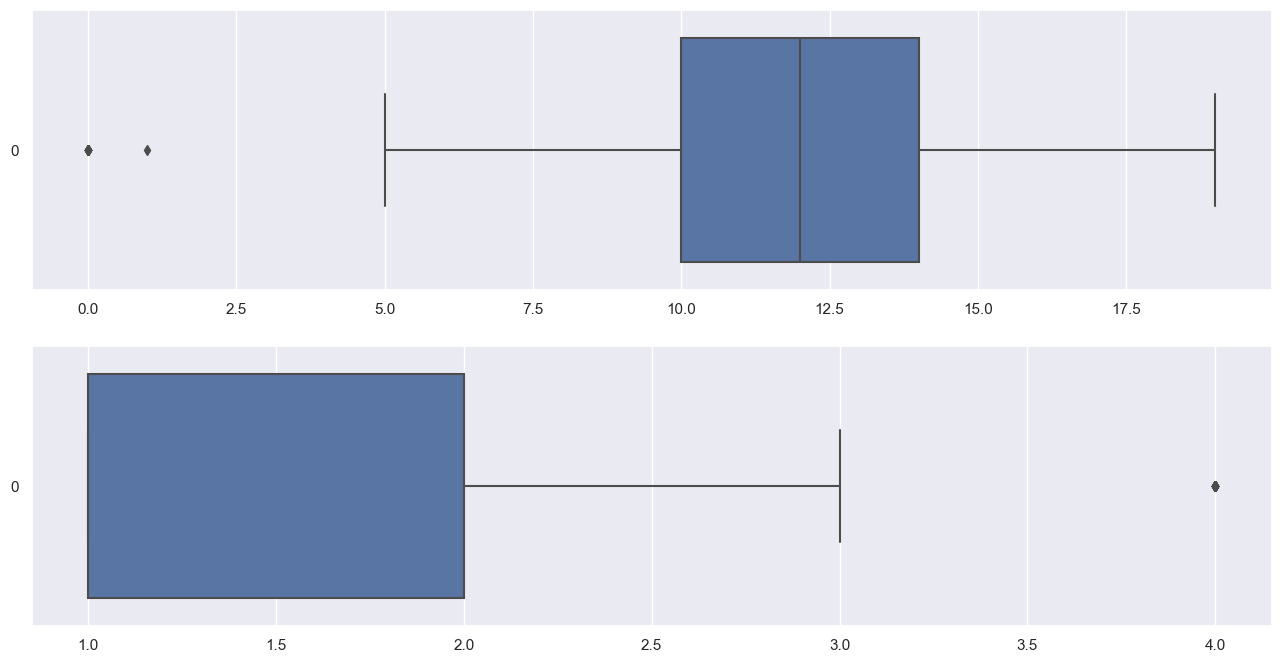

In [15]:
combined = pd.DataFrame(data[['G3','studytime']])
f, axes = plt.subplots(2, 1, figsize=(16, 8))
sb.boxplot(data = combined["G3"], orient = "h", ax = axes[0])
sb.boxplot(data = combined["studytime"], orient = "h", ax = axes[1])

G3 = pd.DataFrame(data['G3'])   # Response
studytime = pd.DataFrame(data['studytime'])   # predictor

print(G3)
print(studytime)

q1 = combined.quantile(0.25)
q3 = combined.quantile(0.75)
iqr = q3 - q1
#outliers
outliers = combined[~((combined < (q1 - 1.5 * iqr)) | (combined > (q3 + 1.5 * iqr))).any(axis=1)]
count = (((combined < (q1 - 1.5 * iqr)) | (combined > (q3 + 1.5 * iqr) ))).sum()
print(count)
outliers

Intercept of Regression 	: b =  [10.3528757]
Coefficients of Regression 	: a =  [[1.01529899]]



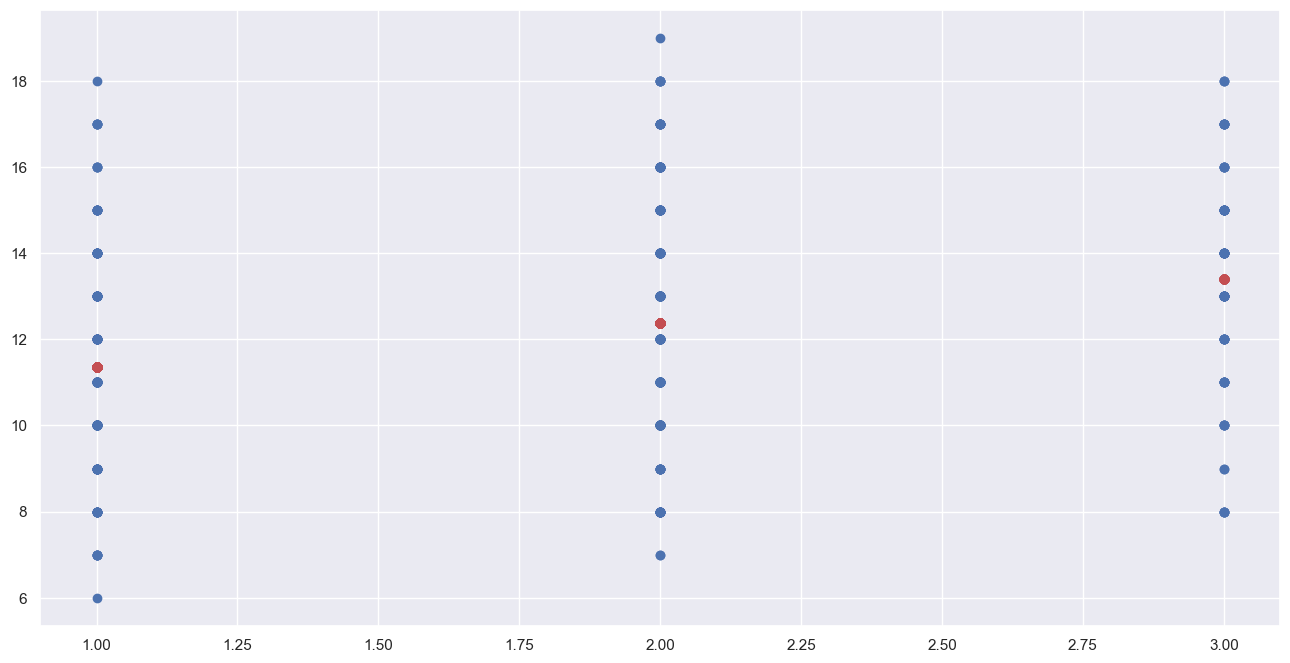

Goodness of Fit of Model on Train dataset
Explained Variance (R^2) 	: 0.06878382639657632
Mean Squared Error (MSE) 	: 6.419772934775923
Root Mean Squared Error (RMSE) 	: 2.5337270837199344


In [16]:
G3 = pd.DataFrame(outliers['G3'])   # Response
studytime = pd.DataFrame(outliers['studytime'])   # predictor

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(studytime, G3, test_size = 0.20 , random_state = 4)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict G3 corresponding to studytime Train
y_train_pred = linreg.predict(X_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 8))
plt.scatter(X_train, y_train)
plt.scatter(X_train, y_train_pred, color = "r")
plt.show()

#goodness of fit of the model on the train set
# Explained Variance (R^2)
print('Goodness of Fit of Model on Train dataset')
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(y_train, y_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

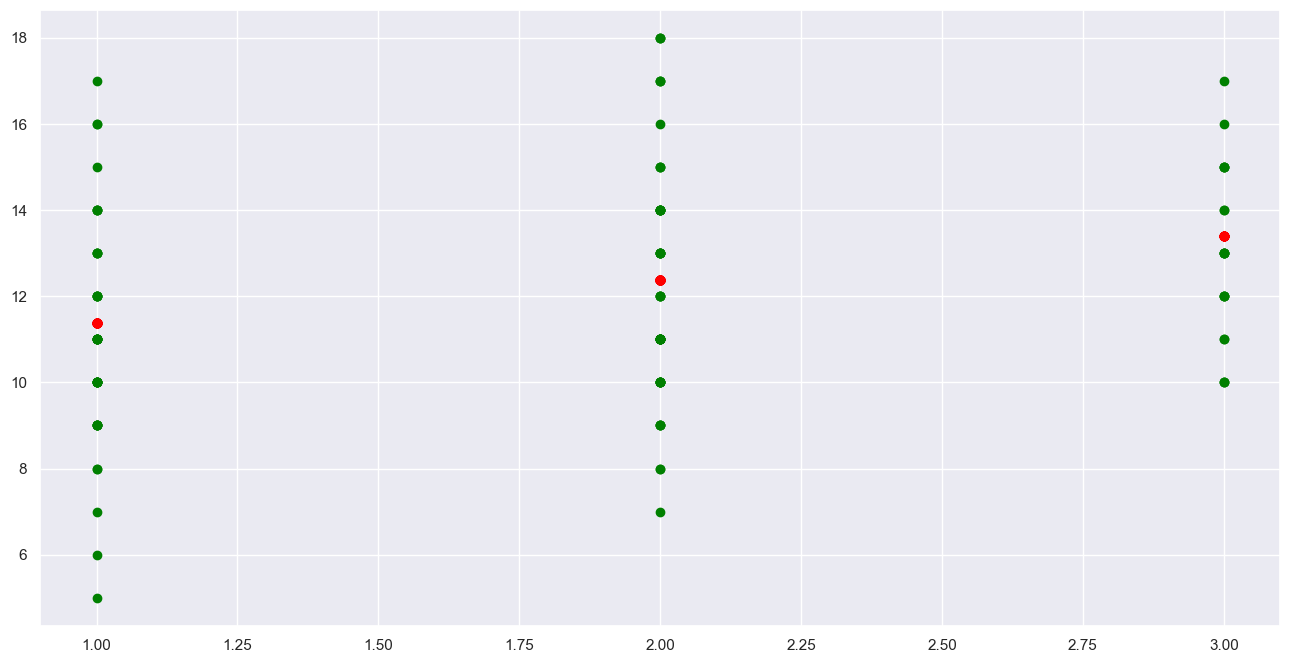

Goodness of Fit of Model on Test dataset
Explained Variance (R^2) 	: 0.06604216509026484
Mean Squared Error (MSE) 	: 6.381007474288847
Root Mean Squared Error (RMSE) 	: 2.52606561163578


In [17]:
# Predict G3 corresponding to studytime Test
y_test_pred = linreg.predict(X_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(X_test, y_test, color = "green")
plt.scatter(X_test, y_test_pred, color = "red")
plt.show()

# Explained Variance (R^2)
print('Goodness of Fit of Model on Test dataset')
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(y_test, y_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

In [18]:
X = pd.DataFrame(outliers['studytime'])  
y = pd.DataFrame(outliers['G3'])                 

# Define the number of folds
k = 5

# Initialize the KFold
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Initialize the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# List to store cross-validation scores
cv_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Evaluate the model
    score = model.score(X_test, y_test)
    
    # Append the score to the list of cross-validation scores
    cv_scores.append(score)

# Calculate and print the mean of the cross-validation scores
print("Mean R^2 Score:", np.mean(cv_scores))


C:\Users\glyni\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\glyni\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\glyni\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean R^2 Score: 0.04641826761747649


C:\Users\glyni\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\glyni\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean R^2 score

-absences : 0.03138555871931772

-health : 0.003079285467823922

-studytime : 0.05162502590426539

---

Based on the mean R^2 scores obtained from the analysis, it appears that the 'studytime' variable demonstrates the highest predictive accuracy among the numeric variables assessed, with a mean R^2 score of approximately 0.05162502590426539. This indicates that 'studytime' has a relatively stronger association with the target variable ('G3' grades) compared to the other numeric variables. On the other hand, 'absences' yielded a mean R^2 score of around 0.03138555871931772, suggesting a somewhat lower predictive power compared to 'studytime'. Lastly, 'health' exhibited the lowest mean R^2 score of approximately 0.003079285467823922, indicating the weakest predictive capability among the numeric variables examined. Therefore, based on these results, we concluded that 'studytime' is the most accurate numeric predictor of 'G3' grades within the given dataset.